**TASK:** compute & plot the posterior of sizes from 0.01 to 5.0.
    
Assume:
- animal observed light intensity u=2
- noise of animal sensor (eye neuron) sigma_u = 1
- mean, variance of prior: v_p = 3, sigma_p = 1

<img src="bayesian_net.jpg" width="200"></div>

See [full tutorial here](https://www.sciencedirect.com/science/article/pii/S0022249615000759#bbr000050).


/Users/andyk/miniconda3/envs/free_energy_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


(array([1.7000e+01, 5.4000e+01, 7.5000e+01, 1.0300e+02, 1.5600e+02,
        1.8200e+02, 2.0900e+02, 2.3200e+02, 2.8900e+02, 2.4800e+02,
        3.1400e+02, 3.5400e+02, 4.0900e+02, 4.7100e+02, 5.0200e+02,
        5.3100e+02, 5.8000e+02, 5.9900e+02, 6.5500e+02, 6.6800e+02,
        6.8800e+02, 7.3800e+02, 7.8600e+02, 8.0800e+02, 8.5300e+02,
        8.7100e+02, 9.3000e+02, 9.8200e+02, 9.8800e+02, 1.0740e+03,
        1.1650e+03, 1.2010e+03, 1.3010e+03, 1.3060e+03, 1.4650e+03,
        1.4390e+03, 1.6010e+03, 1.6320e+03, 1.7150e+03, 1.7070e+03,
        1.8400e+03, 1.9080e+03, 1.9910e+03, 2.0970e+03, 2.1980e+03,
        2.1970e+03, 2.2650e+03, 2.3620e+03, 2.4560e+03, 2.5400e+03,
        2.6790e+03, 2.8900e+03, 2.9520e+03, 3.0840e+03, 3.2010e+03,
        3.3240e+03, 3.3450e+03, 3.5200e+03, 3.7230e+03, 3.8230e+03,
        3.9090e+03, 4.0790e+03, 4.3670e+03, 4.4050e+03, 4.7420e+03,
        4.8870e+03, 5.0740e+03, 5.2560e+03, 5.5400e+03, 5.8350e+03,
        5.8060e+03, 5.9550e+03, 6.3650e+03, 6.61

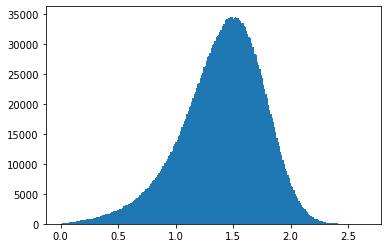

In [59]:
#!pip install pystan matplotlib scipy
import numpy as np
import matplotlib.pyplot as plt

prior = np.random.normal(3.,1.,100000000)
likelihood = np.random.normal(prior,1.)
(likelihood[:10])

plt.hist(np.sqrt(likelihood[(prior>1.99) & (prior<2.1)]),250)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a2f63baca0c828d3f5a8ba96b61e2ca6 NOW.


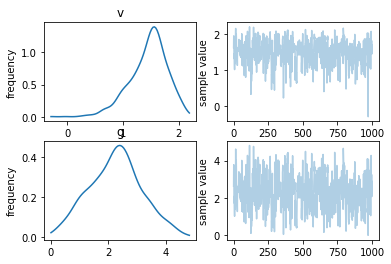

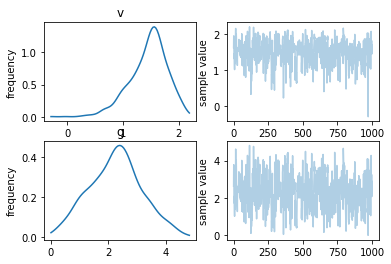

In [1]:
import pystan
import scipy

m_code = """
data {
    real u;
}
parameters {
    real v;
}
transformed parameters {
    real g;
    g = v * v;
}
model {
    v ~ normal(3, 1);  // v_p = 3; sigma_p = 1
    u ~ normal(g, 1);  // sigma_u = 1
}
"""

sm = pystan.StanModel(model_code=m_code)
fit = sm.sampling(data={'u': 2}, iter=1000, chains=2)
fit.plot()